<h1>Practice project for A-Z Handwritten Alphabet Recognition by Deep Learning</h1>

<b>Data Analyzer:</b> Kai-Wei Chang

<p><b>Data Provider:</b> SACHIN PATEL<br>
<b>Obtained From:</b> Kaggle<br>
<b>URL:</b> https://www.kaggle.com/datasets/sachinpatel21/az-handwritten-alphabets-in-csv-format<br>

<h2>Q1: Main objective of the analysis that also specifies whether your model will be focused on a specific type of Deep Learning or Reinforcement Learning algorithm and the benefits that your analysis brings to the business or stakeholders of this data.</h2>

<p><b>Answer:</b><br>
This analysis wil be focused on deep learning algorithms and their applications to in hand writing alphabet recognition and reconstruction<br>
The process would investigate pros and cons of each algorithms for practical uses <br>

In [2]:
import warnings
warnings.simplefilter('ignore')

In [3]:
#Import Data processing libraries
import numpy as np
import pandas as pd
from random import sample
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

<h2>Q2: Brief description of the data set you chose, a summary of its attributes, and an outline of what you are trying to accomplish with this analysis.</h2>

<b>Answer:</b><br>
I am choosing a self-found hand written alphabet datast.<br>
The dataset contains 26 folders (A-Z) containing handwritten images in size 28x28 pixels, each alphabet in the image is centre fitted to 20x20 pixel box.<br>
Each image is stored as Gray-level, at digital range from 0 to 255.<br>
The data will be evaluated for the knowledge depth (number of samples) for each alphabet.

In [4]:
#Load Data, data is preprocessed
rawData=pd.read_csv(r'C:\Users\kai-w\Desktop\05_Deep Learning and Reinforcement Learning\A_Z Handwritten Data.csv',header=0)

In [5]:
rawData.head()

,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,...,0.639,0.640,0.641,0.642,0.643,0.644,0.645,0.646,0.647,0.648
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
rawData.describe()

,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,...,0.639,0.640,0.641,0.642,0.643,0.644,0.645,0.646,0.647,0.648
count,372450.000000,372450.0,372450.0,372450.0,372450.0,372450.0,372450.0,372450.0,372450.0,372450.0,...,372450.000000,372450.000000,372450.000000,372450.000000,372450.000000,372450.000000,372450.000000,372450.000000,372450.000000,372450.000000
mean,13.523490,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.001616,0.001592,0.001117,0.000929,0.000685,0.000596,0.000618,0.000690,0.000239,0.000011
std,6.740824,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.490788,0.517297,0.421332,0.419180,0.385566,0.319820,0.208942,0.335227,0.134852,0.006554
min,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,10.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,14.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,18.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,25.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,252.000000,226.000000,229.000000,228.000000,235.000000,194.000000,103.000000,198.000000,82.000000,4.000000


In [7]:
rawData.dtypes.value_counts()

int64    785
Name: count, dtype: int64

785 columns, implying 28x28 pixel image, and a classifier column<br>
First column indicate character

Text(0, 0.5, 'Image Counts')

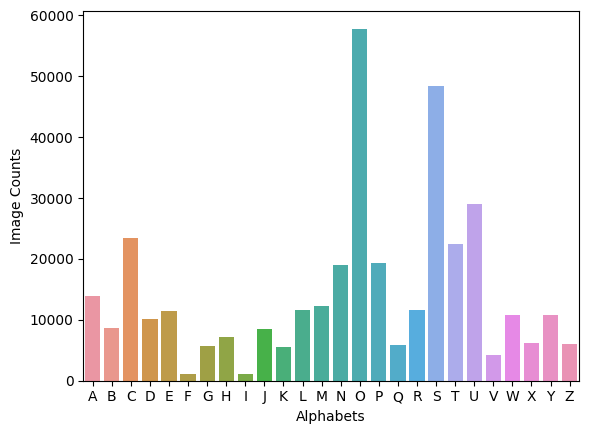

In [8]:
#Distribution of alphabets
alphaDist = rawData.iloc[:,0].value_counts()[range(0,26)]
alphaDict = [chr(65+i) for i in range(0,26)]
fig=sns.barplot(x=alphaDict, y=alphaDist)
fig.set_xlabel('Alphabets')
fig.set_ylabel('Image Counts')

In [9]:
#some basic features
alphaDist.describe()

count       26.000000
mean     14325.000000
std      13353.826172
min       1120.000000
25%       6125.000000
50%      10821.500000
75%      17724.750000
max      57825.000000
Name: count, dtype: float64

In [98]:
#replace column names to 1 to 784
targets=rawData.iloc[:,0]
data=rawData.iloc[:,1:]/255
data.columns=range(1,785)
data.head()

,1,2,3,4,5,6,7,8,9,10,...,775,776,777,778,779,780,781,782,783,784
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [99]:
#Reshape data from 1x784 to 28x28
reshaped_data = data.values.reshape(data.shape[0], 28, 28, 1) #add additional column as filter id
data=reshaped_data

#validate data shape
data.shape

(372450, 28, 28, 1)

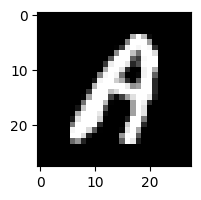

In [13]:
fig = plt.figure
plt.figure(figsize=(2,2))
plt.imshow(data[0], cmap='gray')
plt.show()

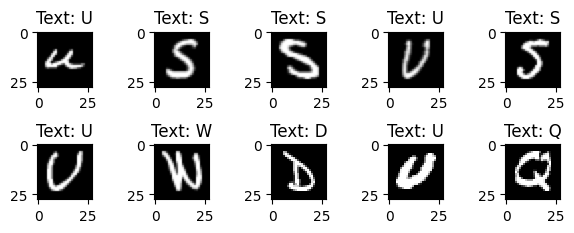

In [14]:
#plot some of the letters to test for data integrity
nFigRow=2
nFigCol=5
fig, axes = plt.subplots(nFigRow, nFigCol, figsize=(1.2*nFigCol,1.2*nFigRow))

for i in range(nFigRow*nFigCol):
    ax = axes[i%nFigRow, i%nFigCol]
    imgIdx = sample(range(0,data.shape[0]),1)[0]
    ax.imshow(data[imgIdx], cmap='gray')
    ax.set_title('Text: {}'.format(chr(targets[imgIdx]+65)))
plt.tight_layout()
plt.show()

<h2>Q3: Brief summary of data exploration and actions taken for data cleaning or feature engineering.</h2>

<b>Answer:</b><br>
Data Exploration:
- Column 0 denote the letter from 0 to 25, denoting alphabets A-Z, will apply chr(65+\<value\>) to convert<br>
- Data values are at range 0 to 255
- The depth for each letter is different, most in "O" fewer in "I" and "F" <br>
- Each letter has at least 1120 samples<br>

Data Engineering:
- Normalized the value to 0-1, by dividing 255 <br>
- Sepatrated store letter identifier as "Targets", and image information as "Data"<br>
- Reformated column to 1 to 784<br>
- Reshaped each record to 28x28 format

<h3>Now going for Machine Learning ...</h3>

In [51]:
#Loading sklearn dependents
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data, targets, stratify=targets, test_size=0.25)

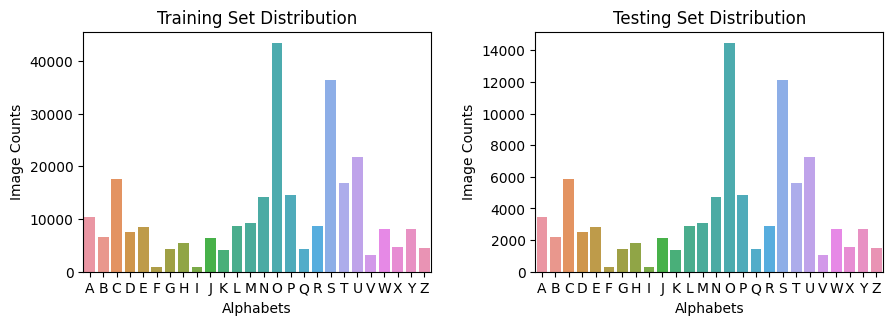

In [16]:
#Distribution of alphabets in train and test sets
alphaDistTrain = y_train.value_counts()[range(0,26)]
alphaDistTest = y_test.value_counts()[range(0,26)]
alphaDict = [chr(65+i) for i in range(0,26)]

#####
fig, axes = plt.subplots(1, 2, figsize=(10,3))
plt.subplots_adjust(left=0.1,bottom=0.1, right=0.9, top=0.9,wspace=0.3, hspace=0.4)
sns.barplot(ax=axes[0], x=alphaDict, y=alphaDistTrain)
axes[0].set_title("Training Set Distribution")
axes[0].set_xlabel('Alphabets')
axes[0].set_ylabel('Image Counts')
sns.barplot(ax=axes[1], x=alphaDict, y=alphaDistTest)
axes[1].set_title("Testing Set Distribution")
axes[1].set_xlabel('Alphabets')
axes[1].set_ylabel('Image Counts')

fig.show()

In [44]:
#loading keras models
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras import backend as K
import gc

In [52]:
# Convert targets to categorical
y_train = keras.utils.to_categorical(y_train, len(y_train.unique()))
y_test = keras.utils.to_categorical(y_test, len(y_test.unique()))

<h3> Deep Learning Model #1</h3><br>
CNN model of CNN DEMO's learning parameters<br>
Only grey scale image, additioanl filter may not be applicable even they are considered in CNN

In [21]:
#Clear failed models due to debug process
K.clear_session()

model = Sequential()

# 5x5 convolution with 2x2 stride and 32 filters; 28x28 > 14x14x32
model.add(Conv2D(filters=32, kernel_size=(5, 5), strides = (2,2), padding='same',
            input_shape=X_train.shape[1:]))
model.add(Activation('relu'))

# another convolution with 2x2 stride and 32 filters; 14x14x32 > 7x7x32
model.add(Conv2D(filters=32, kernel_size=(5, 5), strides = (2,2), padding='same'))
model.add(Activation('relu'))

# 2x2 max pooling to reduces image to 3 x 3 x 32
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# Flatten turns 3x3x32 into 288x1
model.add(Flatten())

# Appply dense layers
model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))
# Output layer
model.add(Dense( y_test.shape[1] ))
model.add(Activation('softmax'))

# Compile model with loss function, optimizer, and evaluation parameters
model.compile(
    loss='categorical_crossentropy', 
    optimizer=keras.optimizers.Adam(), #use Adam optimized with default setting
    metrics=['accuracy'] #evaluate model using accuracy
)

# Save model 1
model.save('DL_Project_CNN_1.h5')

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 14, 14, 32)        832       
_________________________________________________________________
activation (Activation)      (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 7, 7, 32)          25632     
_________________________________________________________________
activation_1 (Activation)    (None, 7, 7, 32)          0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 3, 3, 32)          0         
_________________________________________________________________
dropout (Dropout)            (None, 3, 3, 32)          0         
_________________________________________________________________
flatten (Flatten)            (None, 288)               0

<h3> Deep Learning Model #2</h3><br>
CNN model with lower concolution (1 pass)<br>
Attempt "tanh" for activation<br>
because of grey scale in characters, assume 1 filter

In [87]:
#Clear failed models due to debug process
K.clear_session()

#establish CNN model #2
model = Sequential()

# 5x5 convolution with 2x2 stride and 1 filter; 28x28x1 > 14x14x1
model.add(Conv2D(filters=1, kernel_size=(5, 5), strides = (2,2), padding='same',
            input_shape=X_train.shape[1:]))

# Attempt tanh for learning algorithm
model.add(Activation('relu'))

# 2x2 max pooling to reduces image to 7 x 7 x 1
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# Flatten turns 7x7x1 into 49x1
model.add(Flatten())

# Appply dense layer
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5)) 
# Output layer
model.add(Dense( y_test.shape[1] ))
model.add(Activation('softmax'))

# Compile model with loss function, optimizer, and evaluation parameters
model.compile(
    loss='categorical_crossentropy', 
    optimizer=keras.optimizers.Adam(), #use Adam optimized with default setting
    metrics=['accuracy'] #evaluate model using accuracy
)

# Save model 2
model.save('DL_Project_CNN_2.h5')

model.summary()


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 14, 14, 1)         26        
_________________________________________________________________
activation (Activation)      (None, 14, 14, 1)         0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 7, 7, 1)           0         
_________________________________________________________________
dropout (Dropout)            (None, 7, 7, 1)           0         
_________________________________________________________________
flatten (Flatten)            (None, 49)                0         
_________________________________________________________________
dense (Dense)                (None, 512)               25600     
_________________________________________________________________
activation_1 (Activation)    (None, 512)               0

<h3> Deep Learning Model #3</h3><br>
CNN model of alternative learning parameters, 
1-layer of Convolution of larger strides<br>
Attempt 8 filters for grey scale in characters<br>
Also try 2 desnse layer architecture

In [88]:
#Clear failed models due to debug process
K.clear_session()

model = Sequential()

# 5x5 convolution with 5x5 stride and 1 filters; 28x28 > 6x6x8
model.add(Conv2D(filters=8, kernel_size=(5, 5), strides = (5,5), padding='same',
            input_shape=X_train.shape[1:]))
model.add(Activation('relu'))

# 2x2 max pooling to reduces image to 3 x 3 x 1
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# Flatten turns 3x3x8 into 72x1
model.add(Flatten())

# Appply 2 sequential dense layers of lower number nodes
model.add(Flatten())
model.add(Dense(256))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(256))
model.add(Activation('relu'))
model.add(Dropout(0.5))
# Output layer
model.add(Dense( y_test.shape[1] ))
model.add(Activation('softmax'))

# Compile model with loss function, optimizer, and evaluation parameters
model.compile(
    loss='categorical_crossentropy', 
    optimizer=keras.optimizers.Adam(), #use Adam optimized with default setting
    metrics=['accuracy'] #evaluate model using accuracy
)

# Save model 3
model.save('DL_Project_CNN_3.h5')

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 6, 6, 8)           208       
_________________________________________________________________
activation (Activation)      (None, 6, 6, 8)           0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 3, 3, 8)           0         
_________________________________________________________________
dropout (Dropout)            (None, 3, 3, 8)           0         
_________________________________________________________________
flatten (Flatten)            (None, 72)                0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 72)                0         
_________________________________________________________________
dense (Dense)                (None, 256)               1

<h3>Training Models</h3>

In [89]:
#Set number of samples to be considered for calculating loss function and update the model parameters
batch_size=64 #Mini-Batch Gradient Descent

In [90]:
# Train and fit model 1
model_1 = keras.models.load_model('DL_Project_CNN_1.h5')
model_1_rec=model_1.fit(X_train, y_train, batch_size=batch_size, epochs=15, validation_data=(X_test, y_test), shuffle=True)
K.clear_session()
gc.collect()
del model_1

Epoch 1/15
4365/4365 [==============================] - 79s 18ms/step - loss: 0.2586 - accuracy: 0.9242 - val_loss: 0.0761 - val_accuracy: 0.9792
Epoch 2/15
4365/4365 [==============================] - 47s 11ms/step - loss: 0.1206 - accuracy: 0.9649 - val_loss: 0.0622 - val_accuracy: 0.9824
Epoch 3/15
4365/4365 [==============================] - 48s 11ms/step - loss: 0.0998 - accuracy: 0.9710 - val_loss: 0.0537 - val_accuracy: 0.9853
Epoch 4/15
4365/4365 [==============================] - 47s 11ms/step - loss: 0.0887 - accuracy: 0.9739 - val_loss: 0.0459 - val_accuracy: 0.9875
Epoch 5/15
4365/4365 [==============================] - 46s 11ms/step - loss: 0.0804 - accuracy: 0.9763 - val_loss: 0.0443 - val_accuracy: 0.9875
Epoch 6/15
4365/4365 [==============================] - 46s 11ms/step - loss: 0.0756 - accuracy: 0.9775 - val_loss: 0.0426 - val_accuracy: 0.9886
Epoch 7/15
4365/4365 [==============================] - 47s 11ms/step - loss: 0.0725 - accuracy: 0.9785 - val_loss: 0.0426 -

In [91]:
# Train and fit model 2
model_2 = keras.models.load_model('DL_Project_CNN_2.h5')
model_2_rec=model_2.fit(X_train, y_train, batch_size=batch_size, epochs=15, validation_data=(X_test, y_test), shuffle=True)
K.clear_session()
gc.collect()
del model_2

Epoch 1/15
4365/4365 [==============================] - 39s 9ms/step - loss: 1.1109 - accuracy: 0.6653 - val_loss: 0.5103 - val_accuracy: 0.8829
Epoch 2/15
4365/4365 [==============================] - 37s 8ms/step - loss: 0.8190 - accuracy: 0.7524 - val_loss: 0.4877 - val_accuracy: 0.8906
Epoch 3/15
4365/4365 [==============================] - 37s 8ms/step - loss: 0.7547 - accuracy: 0.7714 - val_loss: 0.4870 - val_accuracy: 0.8873
Epoch 4/15
4365/4365 [==============================] - 37s 8ms/step - loss: 0.7222 - accuracy: 0.7818 - val_loss: 0.4808 - val_accuracy: 0.8864
Epoch 5/15
4365/4365 [==============================] - 37s 8ms/step - loss: 0.6974 - accuracy: 0.7896 - val_loss: 0.5267 - val_accuracy: 0.8686
Epoch 6/15
4365/4365 [==============================] - 37s 8ms/step - loss: 0.6846 - accuracy: 0.7940 - val_loss: 0.4846 - val_accuracy: 0.8857
Epoch 7/15
4365/4365 [==============================] - 39s 9ms/step - loss: 0.6771 - accuracy: 0.7960 - val_loss: 0.4986 - val_ac

In [92]:
# Train and fit model 3
model_3 = keras.models.load_model('DL_Project_CNN_3.h5')
model_3_rec=model_3.fit(X_train, y_train, batch_size=batch_size, epochs=15, validation_data=(X_test, y_test), shuffle=True)
K.clear_session()
gc.collect()
del model_3

Epoch 1/15
4365/4365 [==============================] - 42s 9ms/step - loss: 1.1850 - accuracy: 0.6450 - val_loss: 0.4938 - val_accuracy: 0.8619
Epoch 2/15
4365/4365 [==============================] - 41s 9ms/step - loss: 0.8681 - accuracy: 0.7376 - val_loss: 0.4176 - val_accuracy: 0.8789
Epoch 3/15
4365/4365 [==============================] - 40s 9ms/step - loss: 0.8107 - accuracy: 0.7548 - val_loss: 0.3876 - val_accuracy: 0.8877
Epoch 4/15
4365/4365 [==============================] - 40s 9ms/step - loss: 0.7823 - accuracy: 0.7629 - val_loss: 0.3658 - val_accuracy: 0.8973
Epoch 5/15
4365/4365 [==============================] - 42s 10ms/step - loss: 0.7643 - accuracy: 0.7696 - val_loss: 0.3577 - val_accuracy: 0.8976
Epoch 6/15
4365/4365 [==============================] - 40s 9ms/step - loss: 0.7527 - accuracy: 0.7720 - val_loss: 0.3581 - val_accuracy: 0.8991
Epoch 7/15
4365/4365 [==============================] - 41s 9ms/step - loss: 0.7444 - accuracy: 0.7747 - val_loss: 0.3428 - val_a

In [93]:
val_acc=pd.DataFrame([model_1_rec.history['val_accuracy'],
                     model_2_rec.history['val_accuracy'],
                     model_3_rec.history['val_accuracy']]).T
val_acc.index=list(range(1,len(val_acc.index)+1))
val_acc.columns=["Model 1", "Model 2", "Model 3"]


Text(0, 0.5, 'Accuracy')

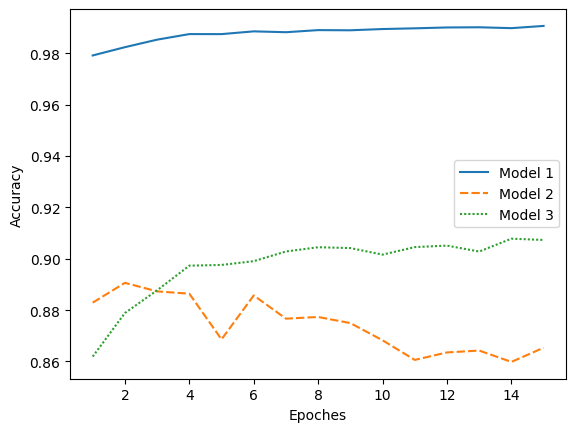

In [94]:
fig=sns.lineplot(val_acc)
fig.set_xlabel('Epoches')
fig.set_ylabel('Accuracy')

<h2>Q4: Summary of training at least three variations of the Deep Learning model you selected. For example, you can use different clustering techniques or different hyperparameters.</h2>

<b>Answer:</b><br>
3 CNN models of different hyperparameters are tested: <br>
Model 1: 2 convolution layers of 32 filters, 5x5 convolution, and 2x2 strides<br>
         &emsp;&emsp;&emsp;&emsp;rendering 288 inputs per picture, and 187,770 parameters to optimize<br>
Model 2: 1 convolution layers of  1 filter,  5x5 convolution, and 2x2 strides, 512-node dense layer for NN<br>
         &emsp;&emsp;&emsp;&emsp;rendering  49 inputs per picture, and  38,964 parameters to optimize, 512-node dense layer for NN<br>
Model 3: 1 convolution layers of  8 filters, 5x5 convolution, and 5x5 strides, 2x256-node dense layer for NN<br>
         &emsp;&emsp;&emsp;&emsp;rendering  72 inputs per picture, and  91,370 parameters to optimize<br>

<b>Summary: </b><br>
In spide of grey-scale image, a 32 filter convolution seem work very well on hand-written alphabet recognition
Comparatively, single convolution layer of 1 filter is able to approach to near 90% accuracy, with much less parameters to optimize. But this model requires more training
Increase filter seem have better initial prediction, but less improvements observed. Larger stride seem not affect too much after some adequate amount of training. Nevertheless, 2-layered NN with same amout of nodes seem make some minor improvements long with each epoch. In spite of higher number of parameters for optimization, the final predictability seem only have small improvements.

<h2>Q5: A paragraph explaining which of your Deep Learning models you recommend as a final model that best fits your needs in terms of accuracy or explainability.</h2>

<b>Answer:</b><br>
For this data set of hand-written alphabetic letters, first model of 2-layered convolution with 32 filters achieved best accuracy, at 99.13%, at cost of higher number of inputs after convolution and more parameters to optimize <br>

<h2>Q6: Summary Key Findings and Insights, which walks your reader through the main findings of your modeling exercise.
</h2>

<b>Answer:</b><br>
1. Number of filters in convolution layer is important for initial parameter optimization<br>
2. 2-layer convolution seem lead to better improvements in initial parameter optimization<br>
3. ReLu may not be the best activation method for low filter convolution<br>

<h2>Q7: Suggestions for next steps in analyzing this data, which may include suggesting revisiting this model or adding specific data features to achieve a better model.</h2>

<b>Answer:</b><br>
It is difficult to optimize CNN architecture as many parameters are to be evaluated. As for this gray-scale alphabetic dataset, hyperparameters suchs as kernel and strides may be of less impact to the final predictability.
On the other hand, should the alphabetic become RGB color, the CNN may be adjusted with different kernel size and strides.
On the other hand, the number of layers may also be investigated further.